# INF 8215 - Intelligence artif.: méthodes et algorithmes 
## Fall 2018 - TP3 - Machine Learning

**Due date: December 6**

**Files to submit:**
    * TP3_EN.ipynb filled
    * SoftmaxClassifier.py filled
    * test_prediction.csv prediction file

## Introduction

The purpose of this lab is to give you an overview of the general course of a machine learning project while familiarizing you with adapted python libraries.


In the first part, you will implement a multi-class classification algorithm called **softmax regression** using only **numpy** library and embed it in the **scikit-learn** library.

In the second part, you will learn about the **dataset** used for this project. Moreover, you will have to perform the **preprocessing** of these data so that it can be used in conventional machine learning algorithms. To this end, you will use **pandas** and **scikit-learn** libraries.

Finally, in the third part, you will compare the efficiency of the model that you have implemented with other models already implemented in **scikit-learn**. Then you will try to improve the performance of the selected algorithm.

Once all these steps are done, you will submit your results on the **kaggle** platform.

## Installation

To install **pandas** and **scikit-learn**, the easiest way is to download and install **Anaconda**, which groups together the most used packages for scientific computing and data science.

You will find the distribution here: https://www.anaconda.com/download/#linux.

Make sure you have **scikit-learn** **20.0**.

## Bonus 1: Competition (2 points)

When you finish the lab, you can submit your predictions on **kaggle**, you will get your performance in terms of **log loss**.
You can then send me this result by email (laurent.boucaud@polymtl.ca) and join your prediction file on the test set (for verification).

A conversation in the forum will be created to keep up to date the best score obtained by one of the teams of the course.

As long as no forum is created, **do not send me your performances if they are above 0.8 of log loss**.

Once the first best score posted in the forum, **only give me your results if your log loss is lower than the previous best score**.

The number of points obtained will be proportional to the ranking of the teams.

# 1. Softmax Regression (10 points)


In this part you will implement **softmax regression**, the **logistic regression** variant which allows you to perform classification for a class number greater than 2.

The code to be completed is in the **SoftmaxClassifier.py** file.

**For this exercise, the constraint is to use only the numpy library **

## Sklearn encapsulation


The class **SoftmaxClassifier** inherits from the **BaseEstimator** and **ClassifierMixin** classes from **scikit-learn** which will allow us to easily use the tools provided by scikit-learn with our classifier later.

For compatibility, the classifier necessarily implements the methods:

* **fit**: responsible for training the model
* **predict_proba**: Predicts the probability of each class for each example in the dataset provided.
* **predict**: Predicts the class for each example in the provided dataset.
* **score**: quantifies the difference between the predicted classes and the actual classes for the dataset provided


## Train/Test set:

When one wants to test the performance of learning a machine learning algorithm, one **does not test it on the data used for learning**.

Indeed, what interests us is that our algorithm is able to generalize its predictions to the data that it has never seen.

To illustrate, if we test an algorithm on the training data, we test its ability to **learn by heart** the dataset and not to **generalize**.

Therefore, when receiving a new dataset, the first thing to do is to **split it into two parts**: a **train set** (**70-80%** of the dataset) and a **test set** (**20-30%** of the dataset).

All **data processing** and **learning algorithms** should be learned only on the training set and then applied to the test set.

By doing so, the lack of prior knowledge of the test set during training is ensured.

## Gradient descent

Gradient descent is an algorithm that allows finding the optimal solution of a certain number of problems. The principle is as follows: we define a **cost function J** that characterizes the problem.
This function depends on a set of **$\theta$** parameters. Gradient descent seeks to **minimize** the cost function by **iteratively modifying** the parameters.

### Gradient

The cost function gradient for a given $\theta$, is the direction in which $\theta$ must be modified to reduce the value of the cost function.

The cost function is minimal when the gradient is zero.

Concretely, we initialize $\theta$ randomly, and we do at each iteration a step to reduce the cost function until convergence of the algorithm to a minimum of the cost function.

### Learning rate


The learning rate represents the size of the step that will be made in the direction of the gradient.
The larger it is, the faster the convergence, but there is a risk that the algorithm will diverge.

The smaller it is, the slower the convergence.

### Batch gradient descent

There are several gradient descent algorithms. We will use Batch gradient descent.

In this algorithm, before updating $\theta$, we calculate the gradients on all the training examples.

### Epoch

This is a step of the gradient descent, a single gradient update.

### Bias/Variance tradeoff

When training a machine learning algorithm we look for a tradeoff between **bias** and **variance**.

A model with a **strong bias**, is a model that is **too simple** for the given data structure (e.g., a linear model for quadratic data), this limits the capacity of the model to generalize. We also call bias  **underfitting**.

A model with a **high variance** means that it is sensitive to small variations in training data, this corresponds to **overfitting**, i.e., the model is too close to the structure of the training set which **limits its ability to generalize**.

A model with a **significant bias** will have a **poor** performance over the **training set**.
A model with a **significant variance** will have a much worse **performance** on the entire **test set** than on the  **train set**.



### One-hot-encoding

In machine learning to represent a vector of categorical data, we use one-hot encoding.

For a vector containing 5 examples and 3 different categories, it is represented as a matrix of size 5 by 3. This matrix is entirely filled with 0 except for the index corresponding to the number of the class for each example.


For example
$ y = \left(\begin{array}{cc} 
1 \\
1 \\
2 \\
3 \\
2 \\
\end{array}\right) $

becomes:

$ yohe =  \left(\begin{array}{cc} 
1. & 0. & 0.\\
1. & 0. & 0.\\
0. & 1. & 0.\\
0. & 0. & 1.\\
0. & 1. & 0.\\
\end{array}\right) $


#### Question 1 (1 point)
Implement the **_one_hot** method in SoftmaxClassifier.py

In [2]:
def _one_hot(self,y):
    tmp=np.zeros((y.shape[0],self.nb_classes))
    for i in range(y.shape[0]):
        invoked_classc=int(y[i][0])
        tmp[i][invoked_classc]=1
    return tmp

### Weight matrix

Let $ X_{m * n} $ be the example matrix and $ \Theta _{n*K} $ the weight matrix with:

* **m** number of examples
* **n** number of features
* **k** number of target classes



It is common to add an additional column to X, this column is filled with 1. To take into account this change, we must add a line to the matrix $\Theta$.

We get X_bias$_{m*(n+1)}$ et $ \Theta _{(n+1)*K} $


Intuitively, each class K is associated with a $\theta$ column.

We denote by $\theta_k$ (n+1 dimension vector) the weight column associated with the prediction of class k .

$\Theta$ = [$\theta_0$,$\theta_1$... $\theta_k$ ... $\theta_n$ ]

Thus $ z = x * \Theta $ gives a vector of dimension K which are **logits** associated with x for each class.

#### Question 2 (1 point)

In the **fit** function in SoftmaxClassifier.py instantiate X_bias and initialize $\Theta$  randomly. (line 74)

In [3]:
def fit(self, X, y=None):

    prev_loss = np.inf
    self.losses_ = []

    self.nb_feature = X.shape[1]
    self.nb_classes = len(np.unique(y))
    tmp=np.ones((X.shape[0],1))
    X_bias = np.concatenate((tmp,X),axis=1)
    self.theta_=np.random.rand(self.nb_feature+1,self.nb_classes)
    return self

### Softmax

We want to convert the logit vector **z** obtained in the previous part into a **probability vector**.

For this we define the **softmax function**:


$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$


Intuitively, for a logit of z, $z_k$, we take the exponential of this value and divide it by the sum of the exponentials of each logit of the vector **z**. We get $\hat{p_x}^k$ the probability that the example **x** belongs to the class **k**.

The operation is repeated for each logit of the vector **z**.

We thus obtain a probability vector $\hat{p_x}$ for an example **x**.

The division makes it possible to make the sum of the terms of the vector $\hat{p_x}$ equal to 1 which is indispensable for probabilities.

#### Question 3 (1 point)
Implement  **_softmax** method in SoftmaxClassifier.py

In [4]:
def _softmax(self,z):
    prob_vector=np.exp(z)
    tmp_sum=np.sum(prob_vector,axis=1)
    tmp_sum=tmp_sum.reshape(tmp_sum.shape[0],1)
    return prob_vector/tmp_sum

#### Question 4 (1 point)

Using the **_ softmax** function of question 3, implement the **predict_proba** and **predict** methods in SoftmaxClassifier.py

In [5]:
def predict(self, X, y=None):
    try:
        getattr(self, "theta_")
    except AttributeError:
        raise RuntimeError("You must train classifer before predicting data!")
    predicted_prob=self.predict_proba(X,None)
    result=np.argmax(predicted_prob,axis=1)
    return result.reshape(result.shape[0],1)

### Fonction de coût Log loss

Let log loss (ou cross entropy) be the cost function:

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

with:
* **K** number of classes
* **m** number of examples
* $ \hat{p_k}^i  $  probability that example i be of target class k
* $y_k^i$ is 1 if the target class of example i is k, 0 otherwise

**Implementation detail:** Cost function is not defined for probabilities taking values 0. or 1., we must ensure that given $\epsilon$, probabilities are in  [$\epsilon$, 1. - $\epsilon$].
#### Question 5 (1 point)

Implement the **_ cost_function** method in SoftmaxClassifier.py by taking into account the **implementation detail** (self.eps variable) and use it to calculate the **loss** variable in the **fit** method (line 84)

In [6]:
def _cost_function(self,probabilities, y ):
    m=probabilities.shape[0]
    p_processed=np.clip(probabilities,self.eps,1-self.eps)
    cost_sum=0
    y_one_hot=self._one_hot(y)
    for i in range(m):
        c = np.argmax(y_one_hot[i,:]) # class
        cost_sum += np.log(p_processed[i,c])
    return (-1/m)*cost_sum

### Cost function gradient

The **gradient of J** with respect to $\theta_k$ is :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}( \hat{p_k}^i - y_k^i)x^i  $$

with:
* **K** number of target classes
* **m** number of examples
* $ \hat{p_k}^i  $  probability that example i is of class k
* $y_k^i$ is 1 if example i target class is k, 0 otherwise


We can rewrite it as matrices, the **gradient of J** with respect to $\Theta$** is :
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat{p} - y_{ohe}) $$

with:

* $\hat{p}$ predicted probability matrix for every example and every class
* $y_{ohe}$ one-hot encoded y
* $X_{bias}^T$  Transposed matrix of $X_{bias}$
* **\*** Dot product

#### Question 6 (1 point)
Implement  **_get_gradient** method in SoftmaxClassifier.py

In [7]:
def _get_gradient(self,X,y, probas):
    m=y.shape[0]
    tmp=np.ones((X.shape[0],1))
    X_bias = np.concatenate((tmp,X),axis=1)
    gradients_costfunction=(1/m)*np.dot((np.transpose(X_bias)),probas-self._one_hot(y))
    return gradients_costfunction

### Weights update

When the gradient has been computed, we must update the weights with these gradients.


$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


with:
* $\Theta$ weight matrix
* $\gamma$  learning rate
* $\Delta J( \Theta)$ gradient of $J( \Theta)$ with respect to $\Theta$

#### Question 7 (1 point)
Update **self.theta_** in the **fit** method in SoftmaxClassifier.py (line 85)

In [8]:
def fit(self, X, y=None):

    prev_loss = np.inf
    self.losses_ = []

    self.nb_feature = X.shape[1]
    self.nb_classes = len(np.unique(y))

    tmp = np.ones((X.shape[0], 1))
    X_bias = np.concatenate((tmp, X), axis=1)
    self.theta_ = np.random.rand(self.nb_feature + 1, self.nb_classes)

    for epoch in range(self.n_epochs):

        # logits =
        probabilities = self.predict_proba(X)

        loss = self._cost_function(probabilities, y)
        gradient = self._get_gradient(X, y, probabilities)
        self.theta_ = self.theta_ - self.lr * gradient

        self.losses_.append(loss)
    return self

### Regularization

To limit **overfitting**, we use the regularization, we add a term to the function of cost $J( \Theta)$.

This term will add constraints on the weight of the model during training.
We will use the **L2** regularization:


$$ L2(\Theta) = \alpha \sum_{\substack{1<=i<n}} \sum_{\substack{0<=k<K}} \theta_{i,k}^2 $$ 

with:

* $\alpha$ regularization coefficient

**Note:** The first sum does not start at 0 but at 1 because we do not adjust the weights associated with the X bias column.

Adding this term leads the model to learn the data while keeping its weight as small as possible.



#### Question 8 (1 point)

Modify the methods **_ get_gradient** and **_ cost_function** to take into account the regularization when the boolean self.regularization is true in SoftmaxClassifier.py

In [9]:
def _get_gradient(self,X,y, probas):
    if self.regularization:
        m=y.shape[0]
        tmp=np.ones((X.shape[0],1))
        X_bias = np.concatenate((tmp,X),axis=1)
        tmp_labels=self._one_hot(y)
        tmp_subtraction=probas-tmp_labels
        gradients_costfunction=(1/m)*(np.dot((np.transpose(X_bias)),tmp_subtraction))
        gradients_costfunction[1:,:]+=2*self.alpha*self.theta_[1:,:]/m
    else:
        m=y.shape[0]
        tmp=np.ones((X.shape[0],1))
        X_bias = np.concatenate((tmp,X),axis=1)
        gradients_costfunction=(1/m)*np.dot((np.transpose(X_bias)),probas-self._one_hot(y))
    return gradients_costfunction


#### Question 9 (1 point)

The regularization term is used only during training. When one wants to evaluate the performance of the model **after training**, one uses the **non-regulated** cost function.

Implement the **score** function that evaluates the quality of the prediction **after training** in SoftmaxClassifier.py

In [10]:
def score(self, X, y=None):
    sum_number=X.shape[0]
    result=self.predict(X,y)
    tmp=result-y
    right_number=sum(tmp==0)
    return right_number[0]/sum_number

### Early stopping

Too many **epochs** can result in **overfitting**.
To overcome this problem, we can use the mechanism of **early stopping**.
This aims to stop the training if the difference in the cost function between two **consecutive epochs** is less than a defined **threshold**.




#### Question 10 (1 point)

Finish implementing the **fit** function by adding the **early stopping** mechanism when the **self.early_stopping** boolean is true. The threshold is given by the **self.threshold variable** .

In [11]:
def fit(self, X, y=None):

    prev_loss = np.inf
    self.losses_ = []

    self.nb_feature = X.shape[1]
    self.nb_classes = len(np.unique(y))

    tmp = np.ones((X.shape[0], 1))
    X_bias = np.concatenate((tmp, X), axis=1)
    self.theta_ = np.random.rand(self.nb_feature + 1, self.nb_classes)

    for epoch in range(self.n_epochs):

        # logits =
        probabilities = self.predict_proba(X)

        loss = self._cost_function(probabilities, y)
        gradient = self._get_gradient(X, y, probabilities)
        self.theta_ = self.theta_ - self.lr * gradient
        self.losses_.append(loss)
        if self.early_stopping:
            if epoch > 1 and abs(self.losses_[epoch] - self.losses_[epoch - 1]) < self.threshold:
                break
    return self

## Testing the solution:

The code below imports the **iris** multiclass  classification dataset available on sklearn. The data is divided into two parts, the training set and the test set, and then they are normalized.

The classifier implemented in the **SoftmaxClassifier.py** file is imported and then trained on the training set and tested on the test set.

The purpose of this part is just to check your implementation **when you are sure your code is working**.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from SoftmaxClassifier import SoftmaxClassifier

# load dataset
data,target =load_iris().data,load_iris().target

# split data in train/test sets
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.33, random_state=42)

# standardize columns using normal distribution
# fit on X_train and not on X_test to avoid Data Leakage
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [2]:
#from SoftmaxClassifier import SoftmaxClassifier

# import the custom classifier
cl = SoftmaxClassifier()
y_train=y_train.reshape((y_train.shape[0],1))
# train on X_train and not on X_test to avoid overfitting
train_p = cl.fit_predict(X_train,y_train)
test_p = cl.predict(X_test)

If you get relatively close values for the test and training set, and they are at least greater than 0.8, your model should be correct.

In [3]:
from sklearn.metrics import precision_recall_fscore_support

# display precision, recall and f1-score on train/test set
print("train : "+ str(precision_recall_fscore_support(y_train, train_p,average = "macro")))
print("test : "+ str(precision_recall_fscore_support(y_test, test_p,average = "macro")))

train : (0.86956521739130432, 0.84705882352941175, 0.84137931034482749, None)
test : (0.88888888888888884, 0.8222222222222223, 0.81212121212121213, None)


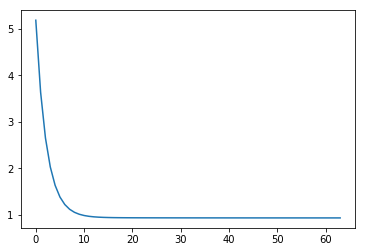

[5.1843274719843393, 3.6347058572777149, 2.6539175829816815, 2.0318695541866796, 1.6365931871047432, 1.3849971288497884, 1.224618299051647, 1.1222462351476659, 1.0568120364897258, 1.0149258887373094, 0.98806623568513829, 0.97080367427808389, 0.95967578447860613, 0.95247287274970194, 0.94778383146001954, 0.94470701824496117, 0.94266600702053971, 0.9412920770470482, 0.94034921860327381, 0.93968624783993826, 0.93920621862355724, 0.93884687672558553, 0.93856816648820918, 0.93834424331832822, 0.93815836577654377, 0.93799962839496664, 0.93786087137767393, 0.93773734287598343, 0.93762584258178461, 0.93752417319836256, 0.93743078887650577, 0.9373445696812498, 0.93726467671789404, 0.93719045889398422, 0.93712139274971806, 0.93705704347702246, 0.93699703952551316, 0.93694105593022892, 0.93688880324679713, 0.93684002009985201, 0.93679446806723821, 0.93675192808115448, 0.93671219782091009, 0.93667508975985714, 0.93664042964932148, 0.93660805529941382, 0.93657781556596131, 0.93654956948444645, 0.93

In [5]:
import matplotlib.pyplot as plt

plt.plot(cl.losses_)
plt.show()
print(cl.losses_)

# 2. Data preprocessing (8 points)

##  Kaggle 

Kaggle is a website dedicated to machine learning. There is a large number of datasets.
Competitions are organized by companies and organisations. These provide a dataset and a goal. The "kagglers" who participate in these competitions submit their results online. There are often prices or jobs for those who get the best results.

This is a good way to develop machine learning skills on real datasets.

You can create an account if you want to compare your results to those already online for the dataset we are going to study.

You can create an account here: https://www.kaggle.com/

## Austin Animal Center Shelter Animal Outcomes dataset
The dataset that we will use is the "Animal Outcomes dataset" available at the following address: https://www.kaggle.com/c/shelter-animal-outcomes.

This is a problem of **multi-class classification** where animals are collected in a shelter after being abandoned, the purpose is to predict how they will "leave" the place:
* Adoption
* Back to the owner
* Death
* Euthanasia
* Transfer to another center

For more information on data, go to kaggle.

## Structure of a machine learning project

The goal of the this part of the lab is to make you study a simplified version of a complete machine learning project:

1. Data cleaning, missing value processing
2. Formatting Data for Use in Machine Learning Algorithms
3. Feature engineering transformation or feature combinations between them
4. Comparison of the performances of the different choices made during the data processing
5. Comparison of the performances of different models (including the one implemented in the first part)
6. Optimization of hyper-parameters


## Scikit-learn
http://scikit-learn.org/stable/

It is a machine learning and data mining library, it offers tools for data analysis and processing, classical machine learning algorithms such as neural networks, logistic regression, SVM or other, finally tools to compare models between them such as cross validation.

## Pandas

A library to store and manipulate data easily

The two basic elements of pandas are the dataframe and the series.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

## Data processing tutorial

** Before continuing the lab **, familiarize yourself with the **pre-processing data**, **pandas** and **scikit-learn**, a tutorial is available in the file: *data_processing_tutorial.ipynb**

## Dataset

#### Load train/test sets

In [6]:
import pandas as pd

PATH = "data/"
X_train = pd.read_csv(PATH + "train.csv")
X_test = pd.read_csv(PATH + "test.csv")

#### Useless features removal

In [7]:
X_train = X_train.drop(columns = ["OutcomeSubtype","AnimalID"])
X_test = X_test.drop(columns = ["ID"])

In [8]:
X_train, y_train = X_train.drop(columns = ["OutcomeType"]),X_train["OutcomeType"]

#### first 5  examples of the training set

In [9]:
X_train.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Hambone,2014-02-12 18:22:00,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,Emily,2013-10-13 12:44:00,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,Pearce,2015-01-31 12:28:00,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,NaN,2014-07-11 19:09:00,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,NaN,2013-11-15 12:52:00,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


#### first 5  examples of the test set

In [10]:
X_test.head()

,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


#### first 5  examples of the target vector

In [11]:
y_train.head()

0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

## To do

To save you time, some of the columns (Name, DateTime, color) have already been processed.


Using the tutorial provided, you must write a complete transformation pipeline for each of the remaining columns in the dataset (AgeuponOutcome, AnimalType, SexuponOutcome, Breed).

You are **free** of your choices, but you must **justify** column by column.
For example, you can choose to combine columns with each other, separate a column or eliminate a column completely if you correctly justify it.


The already preprocessed part of the dataset is loaded in **X_train1** and **X_test1**

In [14]:
X_train1 = pd.read_csv("data/train_preprocessed.csv")
X_test1 = pd.read_csv("data/test_preprocessed.csv")

In [15]:
X_train1.head()

,Color,HasName,Month,Day,Hour
0,0.973624,1.0,2.0,1.0,3.0
1,-1.421532,1.0,10.0,1.0,2.0
2,0.973624,1.0,1.0,3.0,2.0
3,-1.471381,0.0,7.0,1.0,3.0
4,-0.868974,0.0,11.0,1.0,2.0


The dataset part you have to process is:

In [16]:
X_train = X_train.drop(columns = ["Color","Name","DateTime"])
X_test = X_test.drop(columns = ["Color","Name","DateTime"])

In [17]:
X_train.head()

,AnimalType,SexuponOutcome,AgeuponOutcome,Breed
0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix
1,Cat,Spayed Female,1 year,Domestic Shorthair Mix
2,Dog,Neutered Male,2 years,Pit Bull Mix
3,Cat,Intact Male,3 weeks,Domestic Shorthair Mix
4,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle


####  Question 11: AgeuponOutcome (1 point)

Pour la colonne Age Upon Outcome, nous avons décidé de transformer toutes les données sur une même base, soit en semaine. Ce choix a été fais aléatoirement, on aurait pu les mettre en jours, en mois ou en année. Ce qu'il faut comprendre c'est qu'il y a 52.1428228589286 semaines par an et 4.34524 semaines par mois. Une fois les données convertit sur une même base, nous les normalisons à l'aide du StandardScaler. Comme indiqué dans le tutoriel de ce TP, la normalisation est nécessaire pour les données de cette colonne sur une même échelle pour que cette colonne n'impacte pas les autres colonnes lors de l'apprentissage.

In [18]:
import numpy as np
import pandas as pd
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline#, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from preprocessing import TransformationWrapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def convertAgeUponOutcomeToWeeks(text):
    if (not isinstance(text, str)) and math.isnan(text):
       return 0.0
    else:
        number, timeFrame = text.split(" ")
        if timeFrame.lower() == "year" or timeFrame.lower() == "years":
            return float(number) * 52.1428228589286 #52 weeks per year
        elif timeFrame.lower() == "month" or timeFrame.lower() == "months":
            return float(number) * 4.34524 #4 weeks per month
        elif timeFrame.lower() == "week" or timeFrame.lower() == "weeks":
            return float(number) # 1 week per week
        elif timeFrame.lower() == "day" or timeFrame.lower() == "days":
            return float(number) * 1.0/7.0 #because there are 7 days per week

#### Question 12: AnimalType (1 point)

Pour cette colonne, nous avons remarqué qu'il y avait que deux valeurs dans cette colonne, soit "Dog" ou "Cat". Ainsi, nous avons choisi de représenter ces données sous forme binaires. La valeur "Dog" sera représenté par la valeur "0". La valeur "1" pour "Cat". Ce choix a été fait arbitrairement.

In [19]:
def convertAnimalType(text):
    if text == 'Dog':
        return 0
    else:
        return 1

#### Question 13: SexuponOutcome (1 point)

Pour la colonne SexuponOutcome, nous avons remarqué qu'il y avait cinq différentes valeurs, soit "Neutered Male", "Spayed Female", "Intact Male", "Intact Female" et "Unknown". Ainsi, ces valeurs ont été respectivement changé par 0, 1, 2, 3, et 4. Évidemment, comme cette colonne est catégorique, il est nécessaire d'appliquer l'encodage "One Hot Encoding", pour éviter que certains algorithmes d'apprentissage prennent en compte l'ordre numérique des catégories, tel qu'expliqué dans le tutoriel.

In [20]:
def convertSexUponOutcome(text):
    if text == "Neutered Male":
        return 0
    elif text == "Spayed Female":
        return 1
    elif text == "Intact Male":
        return 2
    elif text == "Intact Female":
        return 3
    else:
        return 4

#### Question 14: Breed (1 point)

Pour Breed, nous avons remarqué qu'il existait plus de 1300 valeurs différentes. Il n'est donc pas judicieux de représenter ces 1300 valeurs sous forme de 1300 catégorie différentes comme nous l'avons fait pour la colonne "SexUponOutcome" à la question précédente. La matrice résultant serait beaucoup trop grande. Ainsi, nous avons accepter de perdre de l'information sur cette colonne en extrayant uniquement le fait qu'un animal soit un hybride entre deux animal ou non (un mix ou non). Au moins, nous aurons extrait de l'information de cette colonne plutôt que de l'ignorer complètement. Ainsi, pour déterminer si l'animal est un mix ou non, nous avons vérifié si l'entrée dans cette colonne contenait le mot "mix" ou si elle contenait un séparateur "/". Si l'animal est un mix, alors on mettra la valeur "1" à la ligne correspondante. Sinon, on mettre un "0".

In [21]:
def convertBreed(text):
    text = text.lower()
    if "mix" in text or "/" in text:
        return 1
    else:
        return 0

### Pipeline
**Question 15: Fill the pipeline below (4 points)**

In [22]:
from preprocessing import TransformationWrapper
from preprocessing import LabelEncoderP
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

pipeline_ageuponoutcome_changeToWeeks = Pipeline(
    [
        ('ConvertAgeUponOutcomeToWeeks', TransformationWrapper(transformation=convertAgeUponOutcomeToWeeks)),
        ('Normalization', StandardScaler())
])

pipeline_AnimalType_ChangeAnimalType = Pipeline(
    [
       ('ConvertAnimalType', TransformationWrapper(transformation=convertAnimalType))
    ]
)

pipeline_SexuponOutcome_ChangeSexUponOutcome = Pipeline(
    [
        ('ConvertSexUponOutcome', TransformationWrapper(transformation=convertSexUponOutcome)),
        ('OneHotEncoding', OneHotEncoder(categories='auto', sparse=False))
    ]
)

pipeline_changeBreed = Pipeline(
    [
        ('ChangeBreed', TransformationWrapper(transformation=convertBreed))
    ]
)


full_pipeline = ColumnTransformer(
    [
        ("AgeuponOutcome", pipeline_ageuponoutcome_changeToWeeks, "AgeuponOutcome"),
        ("AnimalType", pipeline_AnimalType_ChangeAnimalType, "AnimalType"),
        ("SexuponOutcome", pipeline_SexuponOutcome_ChangeSexUponOutcome, "SexuponOutcome"),
        ('breed', pipeline_changeBreed, "Breed")
    ], remainder='passthrough'
)

Run the pipeline

In [23]:
columns = ["AgeuponOutcome", "AnimalType", "Neutered Male", "Spayed Female", "Intact Male", "Intact Female", "Unknown", "Mix"]
X_train_prepared = pd.DataFrame(full_pipeline.fit_transform(X_train),columns = columns)
X_test_prepared = pd.DataFrame(full_pipeline.fit_transform(X_test),columns = columns)
X_train_prepared.head()


,AgeuponOutcome,AnimalType,Neutered Male,Spayed Female,Intact Male,Intact Female,Unknown,Mix
0,-0.396515,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.396515,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.059276,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.714351,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.059276,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X_test_prepared.head()

,AgeuponOutcome,AnimalType,Neutered Male,Spayed Female,Intact Male,Intact Female,Unknown,Mix
0,-0.439590,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.042708,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.382893,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.609683,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.042708,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Concatenate both part of the dataset:

In [25]:
X_train = pd.concat([X_train1,X_train_prepared], axis = 1)
X_test = pd.concat([X_test1,X_test_prepared], axis = 1)
X_train.head()


,Color,HasName,Month,Day,Hour,AgeuponOutcome,AnimalType,Neutered Male,Spayed Female,Intact Male,Intact Female,Unknown,Mix
0,0.973624,1.0,2.0,1.0,3.0,-0.396515,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.421532,1.0,10.0,1.0,2.0,-0.396515,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.973624,1.0,1.0,3.0,2.0,-0.059276,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.471381,0.0,7.0,1.0,3.0,-0.714351,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.868974,0.0,11.0,1.0,2.0,-0.059276,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_test.head()

,Color,HasName,Month,Day,Hour,AgeuponOutcome,AnimalType,Neutered Male,Spayed Female,Intact Male,Intact Female,Unknown,Mix
0,0.973624,1.0,10.0,1.0,2.0,-0.439590,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.086797,1.0,7.0,3.0,2.0,-0.042708,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.936310,1.0,1.0,1.0,2.0,-0.382893,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.294900,1.0,12.0,3.0,3.0,-0.609683,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.973624,1.0,9.0,3.0,2.0,-0.042708,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# 3. Model selection (2 points)

Encode the target class as integers to use it
with scikit-learn algorithms

In [27]:
from sklearn.preprocessing import LabelEncoder
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


## Validation set

To compare different models with each other, we can not use the test set, otherwise one would be tempted to keep the model corresponding best to the test set which could lead to overfitting.

It is common to create a new set of the size of the test set, the  **validation** set.


## Cross-validation

Cross-validation is a useful method for comparing the performance of different machine learning models **without creating a validation set**.

There are different types of cross-validation, the most classic procedure is:
* Randomly divide the training set into two parts (90% / 10% for example).
* Train the model on biggest part, and test it on the other part.
* Repeat n times
* Calculate the mean and standard deviation of the results

The benefits are:
* Consider the entire training set for the evaluation (without ignoring the data we would have use in the validation set)
* Obtaining the standard deviation of the results allows a better evaluation of the model's accuracy.

The main disadvantage is the computation time, since one carries out the learning of the model several times, this method can be impossible for datasets containing a large number of example (> 10e5)



## Bonus 2: StratifiedKFold (1 point)

By observing the class distribution of the target attribute (using the pandas visualization functions), justify the use of the sklearn **StratifiedKFold** object for division of the training set when doing cross-validation instead of a pure **random** method.

Based on what we've seen on the following four charts. The first two charts are built in the case of stratify. It could be observed that the proportion of each class in the training set is exactly the same as the validation set. On the other hand, the last two charts are built in the case of random method. We can see a difference on class proportions. For instance the proportion of the first class in the validation set is apparently larger than in the training set.  
StratifiedKFold is used in order to ensure that the training and validation datasets each contain the same percentage of classes. This is very important because essentially we want to verify a model on a validation set that is able to represent the training set well. Otherwise, the validation would not be credential. Therefore, we should respect the proportion of each class in the validation set, which is apparently better than a random-sampling way in the sense of well-representation.

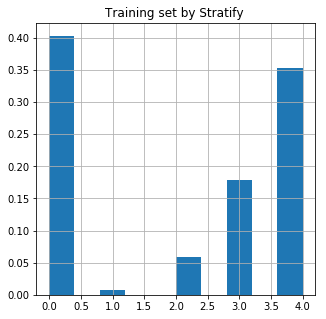

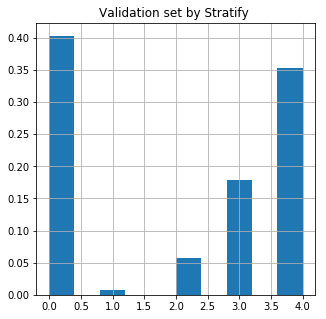

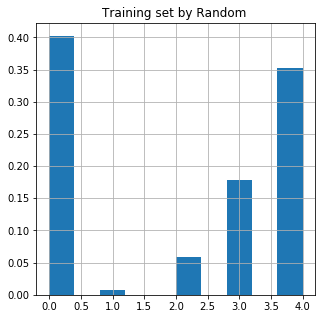

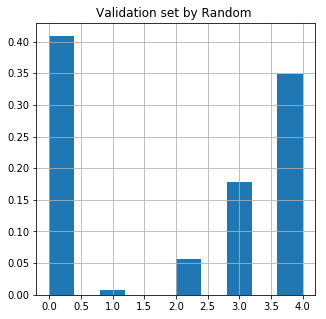

In [28]:
from sklearn.model_selection import StratifiedKFold,train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split( X_train, y_train_label, test_size=0.1, random_state=42,stratify=y_train_label)
m_train=y_train_split.shape[0]
m_test=y_test_split.shape[0]
pd.DataFrame(y_train_split).hist(figsize=(5,5),weights=np.ones(m_train) / m_train)
plt.title("Training set by Stratify ")
pd.DataFrame(y_test_split).hist(figsize=(5,5),weights=np.ones(m_test)/m_test)
plt.title("Validation set by Stratify ")
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split( X_train, y_train_label, test_size=0.1, random_state=42,stratify=None)
m_train=y_train_split.shape[0]
m_test=y_test_split.shape[0]
pd.DataFrame(y_train_split).hist(figsize=(5,5),weights=np.ones(m_train) / m_train)
plt.title("Training set by Random ")
pd.DataFrame(y_test_split).hist(figsize=(5,5),weights=np.ones(m_test)/m_test)
plt.title("Validation set by Random ")
plt.show()

## Question 16: (1 point)


**Choose at least two models allowing the multiclass classification on sklearn in addition to the model implemented in the first part of the TP**.

**Complete the compare function that performs the crossvalidation for different models and different metrics, and returns the list of averages and standard deviations for each of the metrics, for each of the models.**

**Based on the different metrics, conclude on the best performing model.**

Evaluate the models for the different metrics proposed:
* **log loss**: this is the kaggle evaluation metric for this dataset
* **precision**: corresponds to the quality of the prediction, the number of classes correctly predicted by the total prediction number
* **recall**: the number of elements belonging to a class, identified as such, divided by the total number of elements of that class.
* **f-score**: an average of accuracy and recall

**Note: Precision and recall are two complementary measures for evaluating a multi-class classification model.**

In the case of a binary classification with an important target class imbalance, (90% / 10%), evaluating the classification result with accuracy (number of correct predictions divided by the total number of predictions), a very good score (90% accuracy) can be obtained by choosing to systematically predict the majority class.

In such a case, the precision would be high in the same way, but the recall would be very low, indicating the mediocrity of our model.


In [38]:
def compare(models, X_train, y_train, nb_runs,scoring):
    losses=[]
    for m in models:
        tmp_loss=cross_validate(m,X_train,y_train,cv=nb_runs,scoring=scoring)
        losses.append(tmp_loss)
    return losses

In [39]:
from SoftmaxClassifier import SoftmaxClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
y_train_label=y_train_label.reshape((y_train_label.shape[0],1))
X_train=X_train.T
nb_run = 3

models = [

    MLPClassifier(),
    RandomForestClassifier(),
    SoftmaxClassifier()

]
scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']
losses=compare(models,X_train,y_train_label,nb_run,scoring)
idx=['test_neg_log_loss','test_precision_macro','test_recall_macro','test_f1_macro']
for m in losses:
    print("\n-------------------------\n")
    for i in idx:
        print ("The metric is "+ i+ "\n")
        print (m[i])

e:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
e:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



-------------------------

The metric is test_neg_log_loss

[-0.84949998 -0.85284408 -0.84163516]
The metric is test_precision_macro

[ 0.4779417   0.48996549  0.48305244]
The metric is test_recall_macro

[ 0.39690932  0.40521723  0.41888777]
The metric is test_f1_macro

[ 0.40356244  0.41093512  0.4248249 ]

-------------------------

The metric is test_neg_log_loss

[-3.76886489 -4.03879518 -3.64085338]
The metric is test_precision_macro

[ 0.43022201  0.45799961  0.42619532]
The metric is test_recall_macro

[ 0.39783885  0.41827412  0.39584112]
The metric is test_f1_macro

[ 0.40576387  0.43107787  0.40426051]

-------------------------

The metric is test_neg_log_loss

[-0.93864208 -0.97346392 -1.03437939]
The metric is test_precision_macro

[ 0.48939079  0.44659826  0.52138596]
The metric is test_recall_macro

[ 0.36216631  0.35705053  0.33100277]
The metric is test_f1_macro

[ 0.35766365  0.34792016  0.31972849]


e:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
e:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1) negative log loss: Based on this measurement, MLPClassifier is the best since it has the least values.
2) precision: The implemented SoftmaxRegression model seems to be the best even though MLPClassifier is very close.
3) recall: MLPClassifier is the best because averagely it has the largest value, but RandomForestClassifier also works well.
4) f1_score: MLPClassifier and RandomForestClassifier are the same good. Their f1_scores are very close to each other. 
Because of the above analysis, MLPClassifier is selected as the best model.

...

## Question 17: Confusion matrix (0.5 point)

The confusion matrix A is such that $A_{i,j}$ represents the number of examples of class i classified as belonging to class j.

Train the selected model on the entire training set.
Using the confusion matrix and class distribution, analyze in more detail the performance of the chosen model and justify them.

In [43]:
# Train selected model
from sklearn.neural_network import MLPClassifier

selected_model = MLPClassifier()
model = selected_model.fit(X_train,y_train_label)
y_pred=model.predict(X_train)

e:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, index = target_label.classes_)

,Adoption,Died,Euthanasia,Return_to_owner,Transfer
Adoption,8765,1,9,1276,718
Died,17,7,9,16,148
Euthanasia,208,0,258,358,731
Return_to_owner,1821,0,19,2400,546
Transfer,2029,3,109,831,6450


###### Target class distribution

['Adoption' 'Died' 'Euthanasia' 'Return_to_owner' 'Transfer']


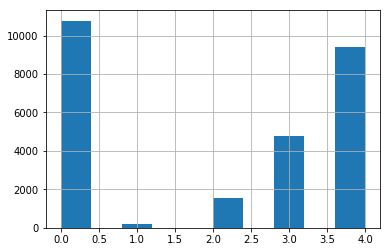

In [48]:
import matplotlib.pyplot as plt 
y_train_label=y_train_label.reshape((y_train_label.shape[0],))
print(target_label.classes_)
pd.Series(y_train_label).hist()

## Bonus 3: Hyper-parameters optimization (1 point)

Hyper-parameters are the parameters set before the learning phase. To optimize the performance of the model, we can select the best hyper-parameters.

Using sklearn, optimize the hyper-parameters of the model you have selected and show that the performance has been improved.
For example, you can use: **GridSearchCV**


Finally, make the prediction on the test set and give your results when submitting the lab.

**Optional**: You can submit your results on kaggle and note your performance in terms of log loss.

In [ ]:
# best_model = 
# pred_test = pd.Series(best_model.transform(X_test))
# pred_test.to_csv("test_prediction.csv",index = False)